In [18]:
%run DES_sumbit.ipynb

In [19]:
print("执行3DES加密算法")
import os,binascii
import random
import string

PRINT_FLAG = False

# time schedule
XOR_Operation_ = []
Int_2_bin_ = []
Permutation_table_ = []
Cycle_shift_left_ = []
Byte_2_Bit_ = []
Initial_Permutation_ = []
PC_1_Permutation_ = []
Ring_Shift_Left_ = []
PC_2_Permutation_ = []
Sub_key_creation_ = []
E_Expansion_ = []
S_Box_permutation_ = []
P_Expansion_ = []
Feistel_network_ = []
Cross_Iteration_Encryption_ = []
Cross_Iteration_Decryption_ = []
P_inverse_Permutation_ = []
Three_DES_Encryption_ = []
DES_Encryption_ = []
Three_DES_Decryption_ = []
DES_Decryption_ = []
Create_Secret_Key_ = []
Three_Des_Create_Secret_Key_ = []
To_Bit_String_ = []
To_Ascii_Char_ = []

执行3DES加密算法


In [20]:
letters = string.ascii_letters
M =  ''.join(random.choice(letters) for i in range(8)) 
print("明文是" , M)

Key1 = createSecrteKey()
Key2 = createSecrteKey()
Key3 = createSecrteKey()
print("key 1 is",Key1)
print("key 2 is",Key2)
print("key 3 is",Key3)

K1 = ToBitString(Key1)
coded_string = Encryption(ToBitString(M), K1)
K2 = ToBitString(Key2)
decipher_string = Decryption(coded_string, K2)
K3 = ToBitString(Key3)
coded_string = Encryption(decipher_string, K3)


print("加密后:" , ToAsciiChar(coded_string))

明文是 VBTWYyjV
key 1 is KKPT-%uO
key 2 is %Jk2LEj!
key 3 is c*T5HR-B
加密后: Ömç¾¿)ú


In [21]:
decipher_string = Decryption(coded_string, K3)
coded_string = Encryption(decipher_string, K2)
decipher_string = Decryption(coded_string, K1)
print("解密后" ,ToAsciiChar(decipher_string) )

解密后 VBTWYyjV


In [22]:
from tqdm.notebook import tqdm
round_number = 5000
for i in tqdm(range(round_number)):
    letters = string.ascii_letters
    M =  ''.join(random.choice(letters) for i in range(8)) 

    ##creating 3 keys for 3 DES
    Three_Des_Create_Secret_Key_start = timer()
    Key1 = createSecrteKey()
    Key2 = createSecrteKey()
    Key3 = createSecrteKey()

    K1 = ToBitString(Key1)
    K2 = ToBitString(Key2)
    K3 = ToBitString(Key3)
    Three_Des_Create_Secret_Key_end = timer()
    Three_Des_Create_Secret_Key_.append(Three_Des_Create_Secret_Key_end - Three_Des_Create_Secret_Key_start)
    
    
    ## 3DES encryption
    Three_DES_Encryption_start = timer()
    
    coded_string = Encryption(ToBitString(M), K1)
    decipher_string = Decryption(coded_string, K2)
    coded_string = Encryption(decipher_string, K3)
    
    output_cipher = ToAsciiChar(coded_string)
    
    Three_DES_Encryption_end = timer()
    Three_DES_Encryption_.append(Three_DES_Encryption_end - Three_DES_Encryption_start)
    
    #print("加密后:" , ToAsciiChar(coded_string))
    
    ## 3DES decryption
    Three_DES_Decryption_start = timer()
    
    decipher_string = Decryption(coded_string, K3)
    coded_string = Encryption(decipher_string, K2)
    decipher_string = Decryption(coded_string, K1)
    
    
    output_decipher = ToAsciiChar(decipher_string)
    
    Three_DES_Decryption_end = timer()
    Three_DES_Decryption_.append(Three_DES_Decryption_end - Three_DES_Decryption_start)
    
    #print("解密后" ,ToAsciiChar(decipher_string) )

In [23]:
general_timestamp = {
    "To_Bit_String" : To_Bit_String_,
    "To_Ascii_Char" : To_Ascii_Char_,
    "3DESCreate_Keys": Three_Des_Create_Secret_Key_,
}

In [24]:
encrpt_timestamp = {
    "XOR_Operation" :        XOR_Operation_,
    "Int_2_bin" :            Int_2_bin_,
    "Permutation_table" :    Permutation_table_,
    "Cycle_shift_left" :     Cycle_shift_left_,
    "Initial_Permutation" :  Initial_Permutation_,
    "PC_1_Permutation" :     PC_1_Permutation_,
    "PC_2_Permutation" :     PC_2_Permutation_,
    "Sub_key_creation" :     Sub_key_creation_,
    "E_Expansion" :          E_Expansion_, 
    "S_Box_permutation" :    S_Box_permutation_,
    "P_Expansion" :          P_Expansion_,
    "Feistel_network" :      Feistel_network_,
    "Cross_Iteration_Encryption":Cross_Iteration_Encryption_,
    "P_inverse_permutation": P_inverse_Permutation_,
    "3DES_Encryption" :      Three_DES_Encryption_,
}

In [25]:
decrpt_timestamp = {
    "XOR_Operation" :        XOR_Operation_,
    "Int_2_bin" :            Int_2_bin_,
    "Permutation_table" :    Permutation_table_,
    "Cycle_shift_left" :     Cycle_shift_left_,
    "Initial_Permutation" :  Initial_Permutation_,
    "PC_1_Permutation" :     PC_1_Permutation_,
    "PC_2_Permutation" :     PC_2_Permutation_,
    "Sub_key_creation" :     Sub_key_creation_,
    "E_Expansion" :          E_Expansion_, 
    "S_Box_permutation" :    S_Box_permutation_,
    "P_Expansion" :          P_Expansion_,
    "Feistel_network" :      Feistel_network_,
    "Cross_Iteration_Decryption":Cross_Iteration_Decryption_,
    "P_inverse_permutation": P_inverse_Permutation_,
    "3DES_Decryption" :      Three_DES_Decryption_,
}

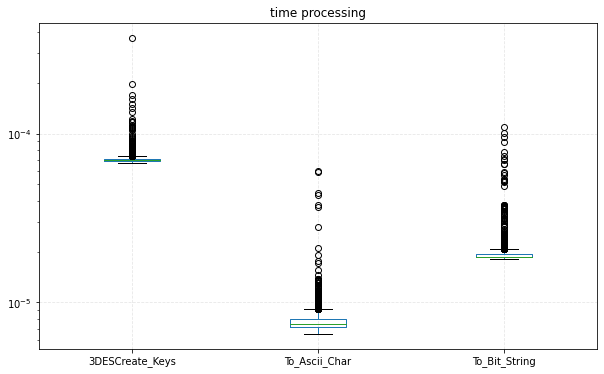

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


df = pd.DataFrame()
for item in general_timestamp.keys():   
    df1 = pd.DataFrame(general_timestamp[item],columns=[item])
    df = pd.concat([df,df1],sort=True)
df.plot.box(title="time processing",logy=True,figsize=(10,6))
plt.grid(linestyle="--", alpha=0.3)
plt.show()

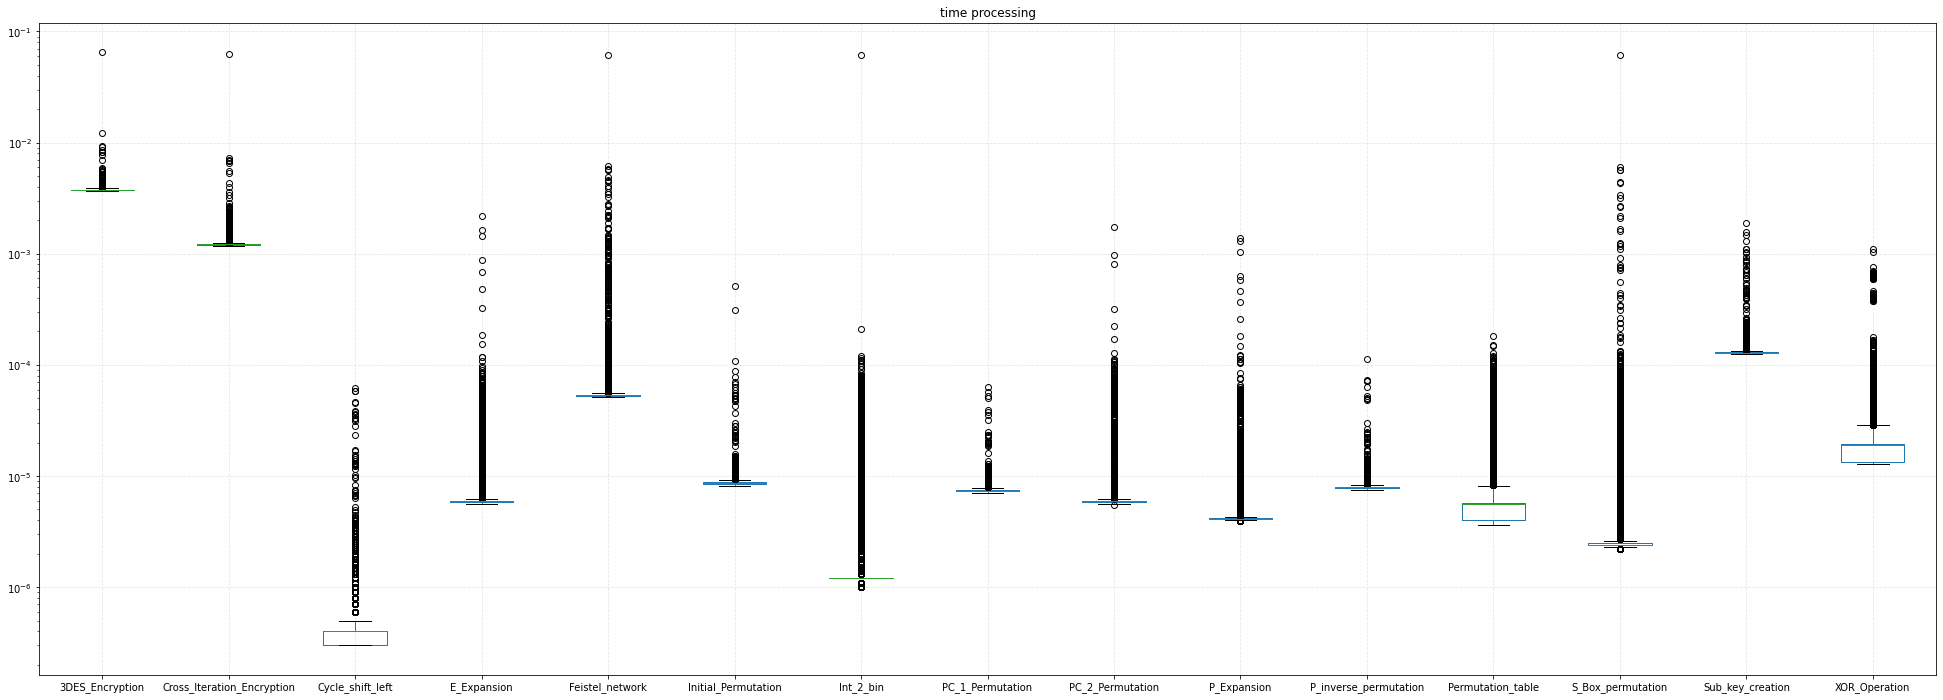

In [32]:
cipher_df = pd.DataFrame()
for item in encrpt_timestamp.keys():   
    cipher_df1 = pd.DataFrame(encrpt_timestamp[item],columns=[item])
    cipher_df = pd.concat([cipher_df,cipher_df1],sort=True)
cipher_df.plot.box(title="time processing",logy=True,figsize=(34,12))
plt.grid(linestyle="--", alpha=0.3)
plt.show()

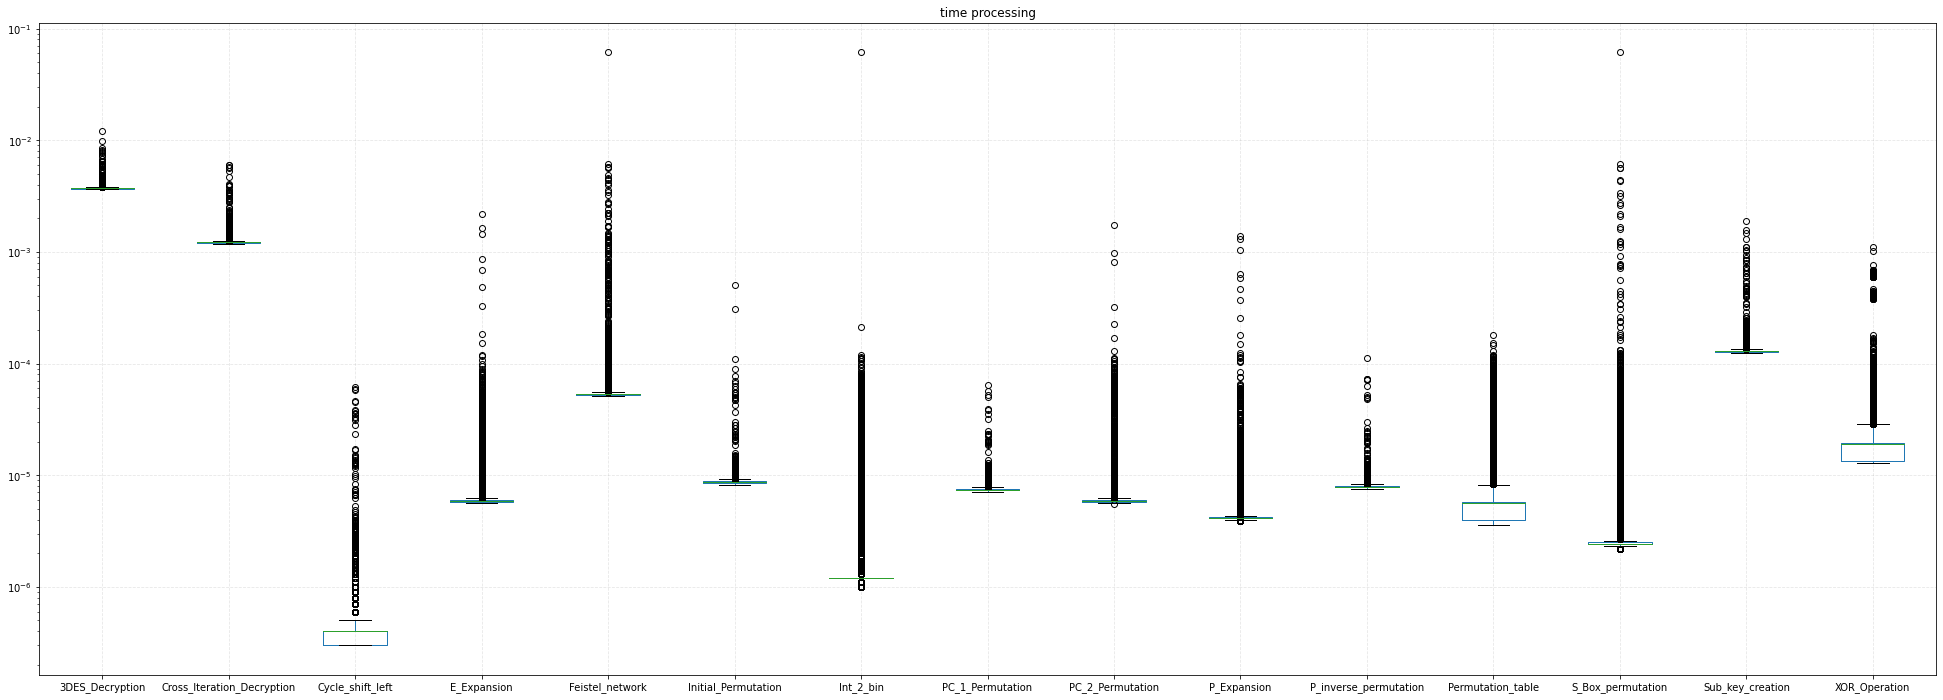

In [28]:
decipher_df = pd.DataFrame()
for item in decrpt_timestamp.keys():   
    decipher_df1 = pd.DataFrame(decrpt_timestamp[item],columns=[item])
    decipher_df = pd.concat([decipher_df,decipher_df1],sort=True)
decipher_df.plot.box(title="time processing",logy=True,figsize=(34,12))
plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [29]:
for items in general_timestamp.keys():
    print(df[items].describe())

count    20004.000000
mean         0.000019
std          0.000002
min          0.000018
25%          0.000018
50%          0.000019
75%          0.000019
max          0.000109
Name: To_Bit_String, dtype: float64
count    10002.000000
mean         0.000008
std          0.000001
min          0.000006
25%          0.000007
50%          0.000008
75%          0.000008
max          0.000060
Name: To_Ascii_Char, dtype: float64
count    5000.000000
mean        0.000071
std         0.000006
min         0.000067
25%         0.000069
50%         0.000070
75%         0.000071
max         0.000370
Name: 3DESCreate_Keys, dtype: float64


In [36]:
for items in encrpt_timestamp.keys():
    print(cipher_df[items].describe())

count    960192.000000
mean          0.000017
std           0.000006
min           0.000013
25%           0.000014
50%           0.000019
75%           0.000020
max           0.001107
Name: XOR_Operation, dtype: float64
count    4.000800e+06
mean     1.274197e-06
std      3.063716e-05
min      9.999999e-07
25%      1.200000e-06
50%      1.200000e-06
75%      1.200000e-06
max      6.126600e-02
Name: Int_2_bin, dtype: float64
count    1.530306e+06
mean     5.232594e-06
std      1.355009e-06
min      3.600000e-06
25%      4.000000e-06
50%      5.600000e-06
75%      5.700000e-06
max      1.803000e-04
Name: Permutation_table, dtype: float64
count    9.601920e+05
mean     3.665573e-07
std      1.953704e-07
min      2.999998e-07
25%      3.000000e-07
50%      3.999999e-07
75%      4.000001e-07
max      6.140000e-05
Name: Cycle_shift_left, dtype: float64
count    30006.000000
mean         0.000009
std          0.000004
min          0.000008
25%          0.000009
50%          0.000009
75%      

In [35]:
for items in decrpt_timestamp.keys():
    print(decipher_df[items].describe())

count    960192.000000
mean          0.000017
std           0.000006
min           0.000013
25%           0.000014
50%           0.000019
75%           0.000020
max           0.001107
Name: XOR_Operation, dtype: float64
count    4.000800e+06
mean     1.274197e-06
std      3.063716e-05
min      9.999999e-07
25%      1.200000e-06
50%      1.200000e-06
75%      1.200000e-06
max      6.126600e-02
Name: Int_2_bin, dtype: float64
count    1.530306e+06
mean     5.232594e-06
std      1.355009e-06
min      3.600000e-06
25%      4.000000e-06
50%      5.600000e-06
75%      5.700000e-06
max      1.803000e-04
Name: Permutation_table, dtype: float64
count    9.601920e+05
mean     3.665573e-07
std      1.953704e-07
min      2.999998e-07
25%      3.000000e-07
50%      3.999999e-07
75%      4.000001e-07
max      6.140000e-05
Name: Cycle_shift_left, dtype: float64
count    30006.000000
mean         0.000009
std          0.000004
min          0.000008
25%          0.000009
50%          0.000009
75%      